## NAME-A indu sri

Machine Learning  INTERNSHIP @TECHOHACKS

TASK-5

PROJECT NAME: Wine quality prediction

# Importing Libraries


In [17]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [18]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
data = pd.read_csv(url, delimiter=';')


In [19]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [20]:
data.shape

(1599, 12)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


#  Data Preprocessing


In [22]:
print(data.isnull().sum())


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [23]:
print(data.describe())


       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

# Exploratory Data Analysis (EDA)


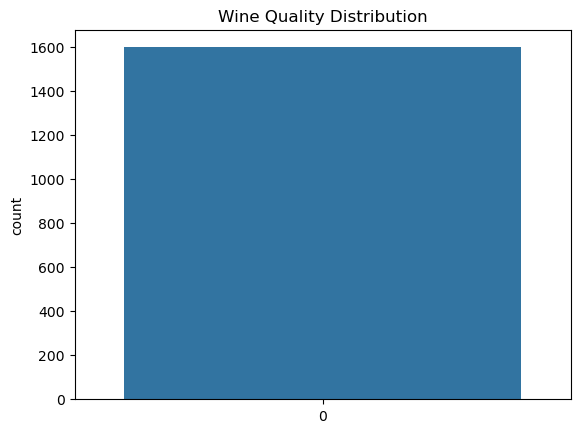

In [24]:
sns.countplot(data['quality'])
plt.title('Wine Quality Distribution')
plt.show()



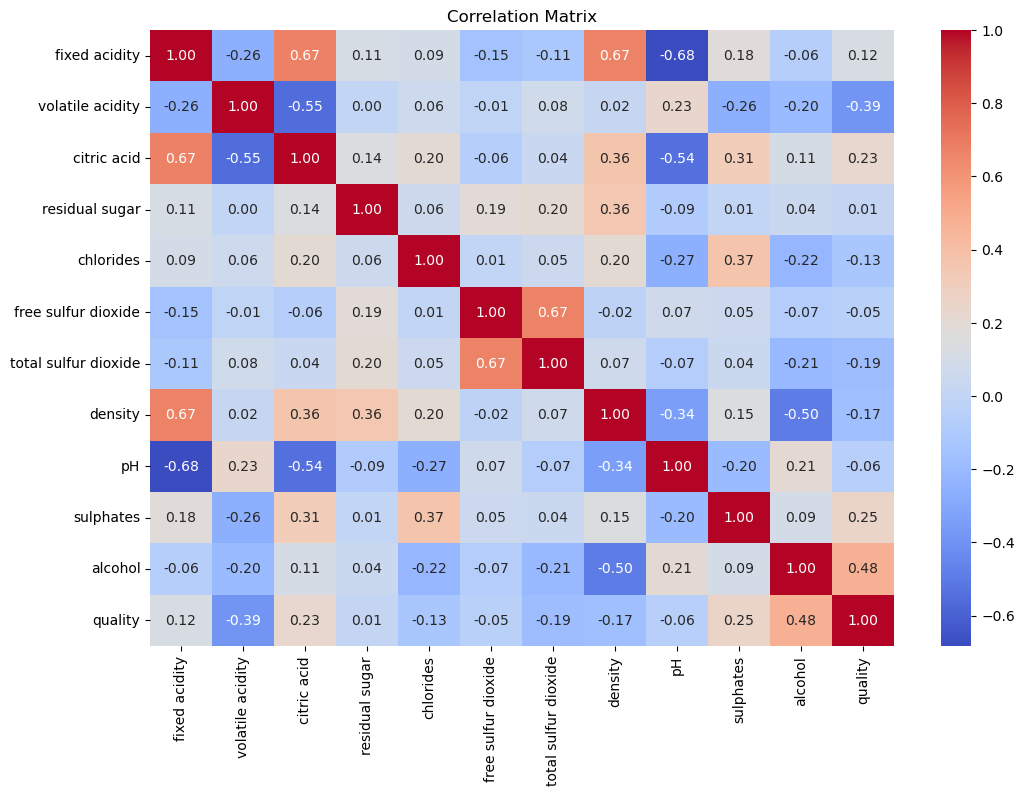

In [25]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Feature Selection/Engineering

In [26]:
X = data.drop('quality', axis=1)
y = data['quality']

In [27]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [28]:
y_binary = y.apply(lambda x: 1 if x >= 7 else 0)  

# Model Training

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_binary, test_size=0.2, random_state=42)



In [30]:
log_reg = LogisticRegression()
rf_clf = RandomForestClassifier()
gb_clf = GradientBoostingClassifier()

In [31]:
log_reg.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
gb_clf.fit(X_train, y_train)


GradientBoostingClassifier()

# Model Evaluation

In [32]:
log_reg_pred = log_reg.predict(X_test)
rf_clf_pred = rf_clf.predict(X_test)
gb_clf_pred = gb_clf.predict(X_test)

In [33]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_reg_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_clf_pred))
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_clf_pred))

print("\nLogistic Regression Classification Report:\n", classification_report(y_test, log_reg_pred))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, rf_clf_pred))
print("\nGradient Boosting Classification Report:\n", classification_report(y_test, gb_clf_pred))



Logistic Regression Accuracy: 0.865625
Random Forest Accuracy: 0.89375
Gradient Boosting Accuracy: 0.878125

Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.97      0.92       273
           1       0.59      0.28      0.38        47

    accuracy                           0.87       320
   macro avg       0.74      0.62      0.65       320
weighted avg       0.84      0.87      0.84       320


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       273
           1       0.70      0.49      0.57        47

    accuracy                           0.89       320
   macro avg       0.81      0.73      0.76       320
weighted avg       0.88      0.89      0.89       320


Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.96      0.93       273
  

In [34]:
plt.figure(figsize=(18, 5))


<Figure size 1800x500 with 0 Axes>

<Figure size 1800x500 with 0 Axes>

Text(0.5, 1.0, 'Logistic Regression Confusion Matrix')

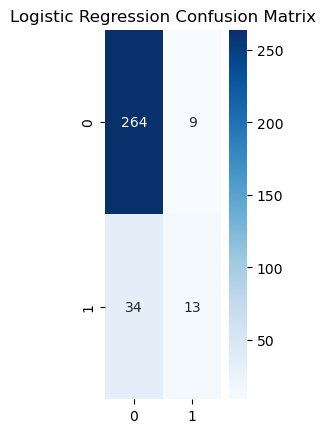

In [35]:
plt.subplot(1, 3, 1)
sns.heatmap(confusion_matrix(y_test, log_reg_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Logistic Regression Confusion Matrix')


Text(0.5, 1.0, 'Random Forest Confusion Matrix')

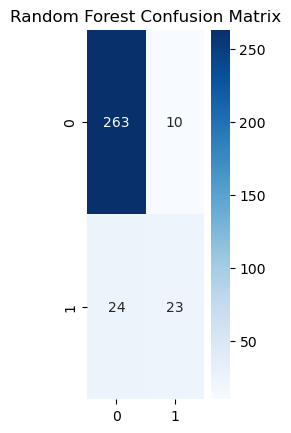

In [36]:
plt.subplot(1, 3, 2)
sns.heatmap(confusion_matrix(y_test, rf_clf_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Random Forest Confusion Matrix')

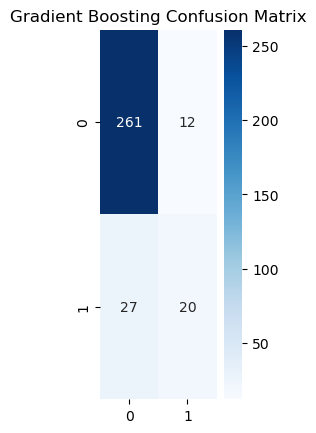

In [37]:
plt.subplot(1, 3, 3)
sns.heatmap(confusion_matrix(y_test, gb_clf_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Gradient Boosting Confusion Matrix')

plt.show()

#  Model Tuning

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)


In [ ]:
print("Best parameters found: ", grid_search.best_params_)
print("Best accuracy found: ", grid_search.best_score_)


In [ ]:
est_rf_clf = grid_search.best_estimator_

In [ ]:
best_rf_clf_pred = best_rf_clf.predict(X_test)
print("Tuned Random Forest Accuracy:", accuracy_score(y_test, best_rf_clf_pred))
print("\nTuned Random Forest Classification Report:\n", classification_report(y_test, best_rf_clf_pred))


In [ ]:
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_matrix(y_test, best_rf_clf_pred), annot=True, fmt='d', cmap='Blues')
plt.title('Tuned Random Forest Confusion Matrix')
plt.show()
